### Import Required Libraries

In [28]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import CSV Data into Pandas Dataframe

In [29]:
student_df = pd.read_csv("data/stud.csv")

### Get Top 5 Rows of Dataset

In [30]:
student_df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Get Row and Column Count of Dataset

In [31]:
student_df.shape

(1000, 8)

### Get Information about the Dataset

In [32]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Get Statistical Summary of Dataset

In [33]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Check for Missing Values

In [34]:
student_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###  Check for Duplicate Values

In [35]:
student_df.duplicated().sum()

0

### Check for Number of Unique Values in each column

In [36]:
student_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check for Unique Values in each column

In [37]:
print("Gender -- ", student_df["gender"].unique(), "\n")
print("Race Ethnicity -- ", student_df["race_ethnicity"].unique(), "\n")
print("Parental Level of Education -- ", student_df["parental_level_of_education"].unique(), "\n")
print("Lunch -- ", student_df["lunch"].unique(), "\n")
print("Test Preparation Course -- ", student_df["test_preparation_course"].unique(), "\n")

Gender --  ['female' 'male'] 

Race Ethnicity --  ['group B' 'group C' 'group A' 'group D' 'group E'] 

Parental Level of Education --  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Lunch --  ['standard' 'free/reduced'] 

Test Preparation Course --  ['none' 'completed'] 



### Check Categorical and Numerical Columns

In [38]:
numerical_features = [feature for feature in student_df.columns if student_df[feature].dtype != 'O']
categorical_features = [feature for feature in student_df.columns if student_df[feature].dtype == 'O']
print("Numerical Feature -- ", numerical_features)
print("Categorical Feature -- ", categorical_features)

Numerical Feature --  ['math_score', 'reading_score', 'writing_score']
Categorical Feature --  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Calculate Average Score in all Three Subjects

In [39]:
student_df["total_score"] = student_df["math_score"] + student_df["reading_score"] + student_df["writing_score"]
student_df["average_score"] = student_df["total_score"] / 3

### Calculate Number of Students with Full Marks in respective subjects

In [40]:
math_full_marks = student_df[student_df["math_score"]==100]["average_score"].count()
reading_full_marks = student_df[student_df["reading_score"]==100]["average_score"].count()
writing_full_marks = student_df[student_df["writing_score"]==100]["average_score"].count()
print("Number of students scoring full marks in maths: ", math_full_marks)
print("Number of students scoring full marks in reading: ", reading_full_marks)
print("Number of students scoring full marks in writing: ", writing_full_marks)

Number of students scoring full marks in maths:  7
Number of students scoring full marks in reading:  17
Number of students scoring full marks in writing:  14


### Calculate Number of Students with less than 20 marks in respective subjects

In [41]:
math_less_marks = student_df[student_df["math_score"] <= 20]["average_score"].count()
reading_less_marks = student_df[student_df["reading_score"] <= 20]["average_score"].count()
writing_less_marks = student_df[student_df["writing_score"] <= 20]["average_score"].count()
print("Number of students scoring full marks in maths: ", math_less_marks)
print("Number of students scoring full marks in reading: ", reading_less_marks)
print("Number of students scoring full marks in writing: ", writing_less_marks)

Number of students scoring full marks in maths:  4
Number of students scoring full marks in reading:  1
Number of students scoring full marks in writing:  3


### Data Visualizations

<Axes: xlabel='average_score', ylabel='Count'>

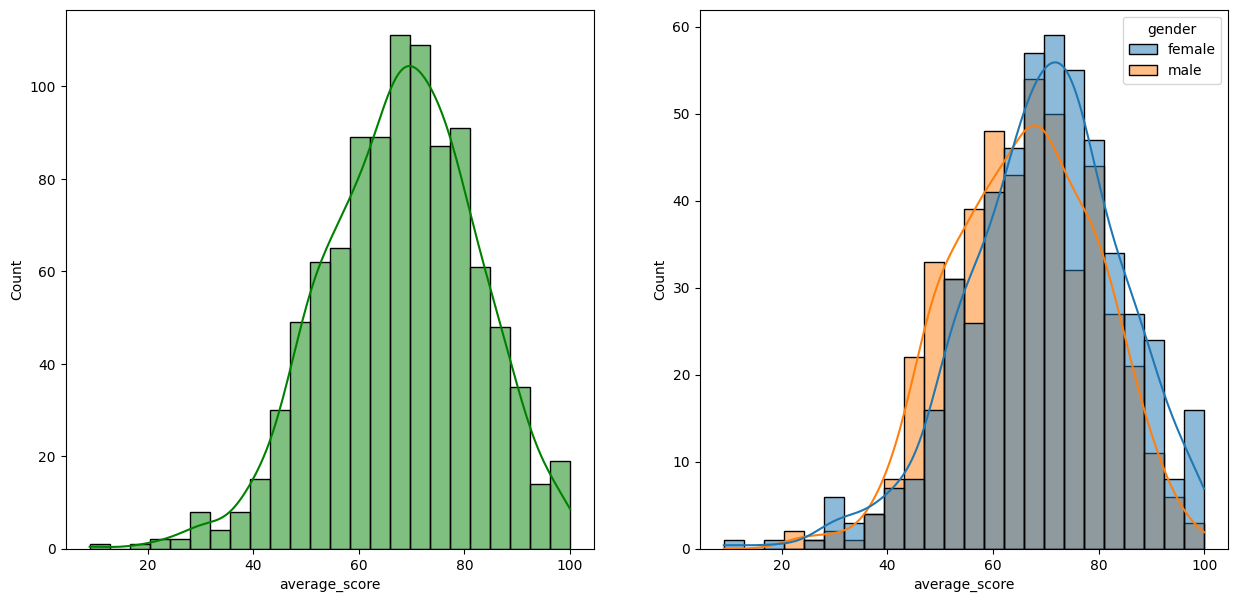

In [42]:
# Gender vs Average score
fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = student_df, x = "average_score", kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = student_df, x = "average_score", kde = True, hue = "gender")

<Axes: xlabel='total_score', ylabel='Count'>

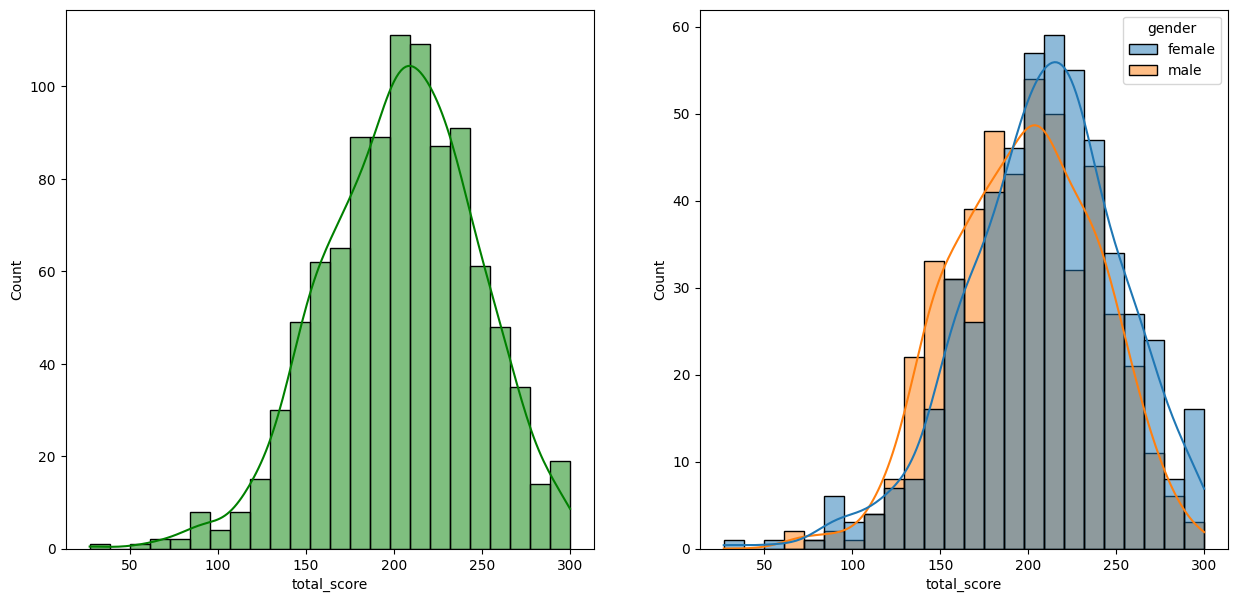

In [43]:
# Gender vs Total score
fig, axes = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = student_df, x = "total_score", kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = student_df, x = "total_score", kde = True, hue = "gender")

<Axes: xlabel='average_score', ylabel='Count'>

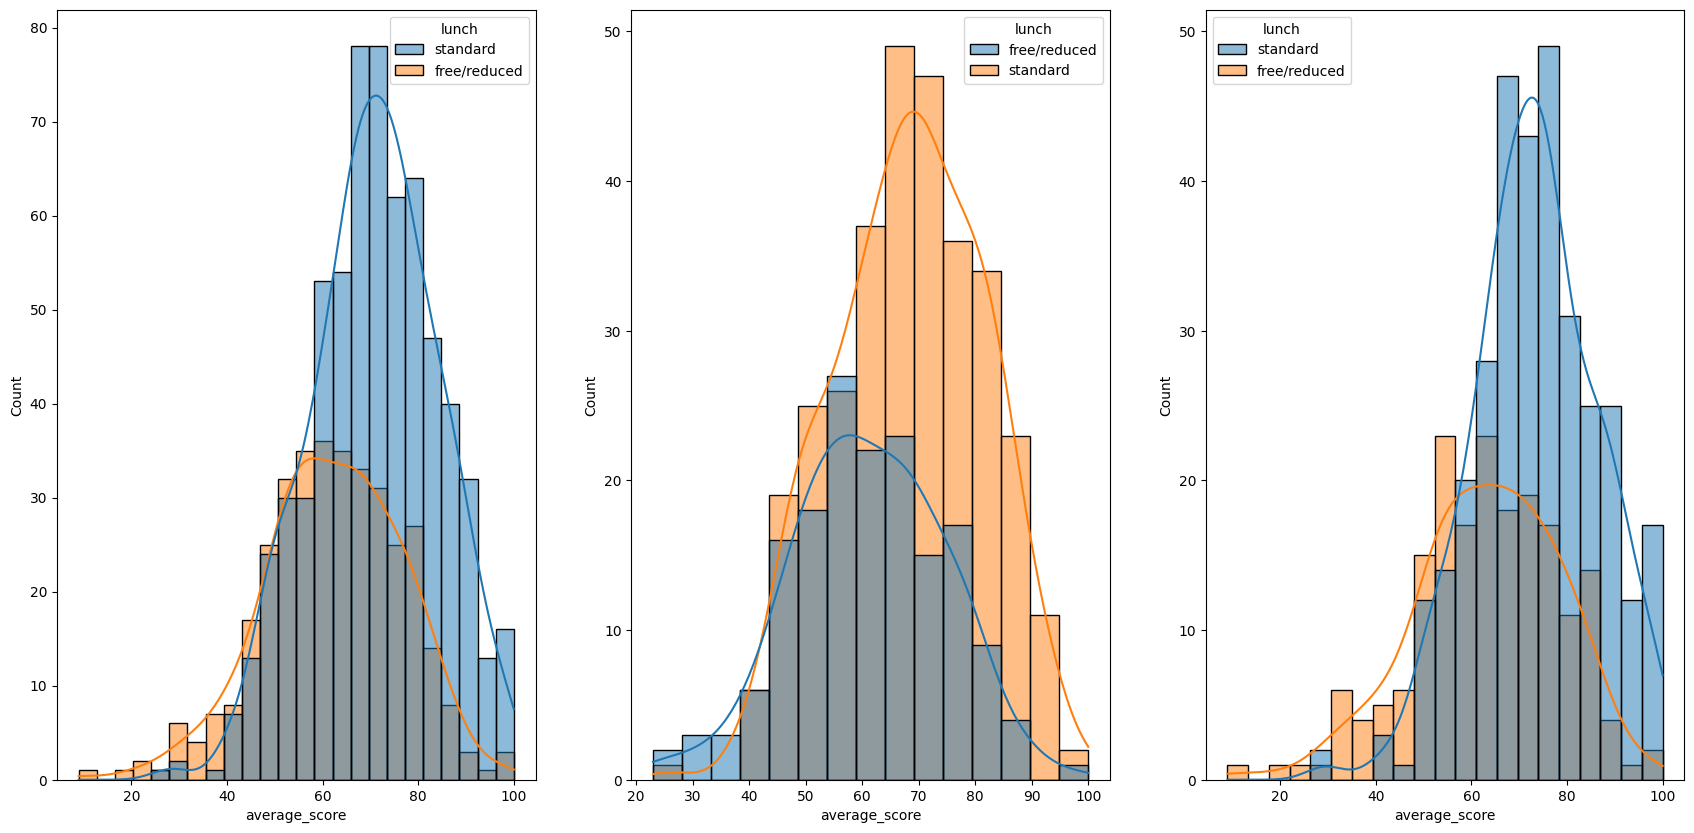

In [44]:
# Lunch vs Average score and for Respective genders 
fig, axes = plt.subplots(1, 3, figsize = (21,10))
plt.subplot(131)
sns.histplot(data = student_df, x = "average_score", kde = True, hue = "lunch")
plt.subplot(132)
sns.histplot(data = student_df[student_df["gender"]=="male"], x = "average_score", kde = True, hue = "lunch")
plt.subplot(133)
sns.histplot(data = student_df[student_df["gender"]=="female"], x = "average_score", kde = True, hue = "lunch")


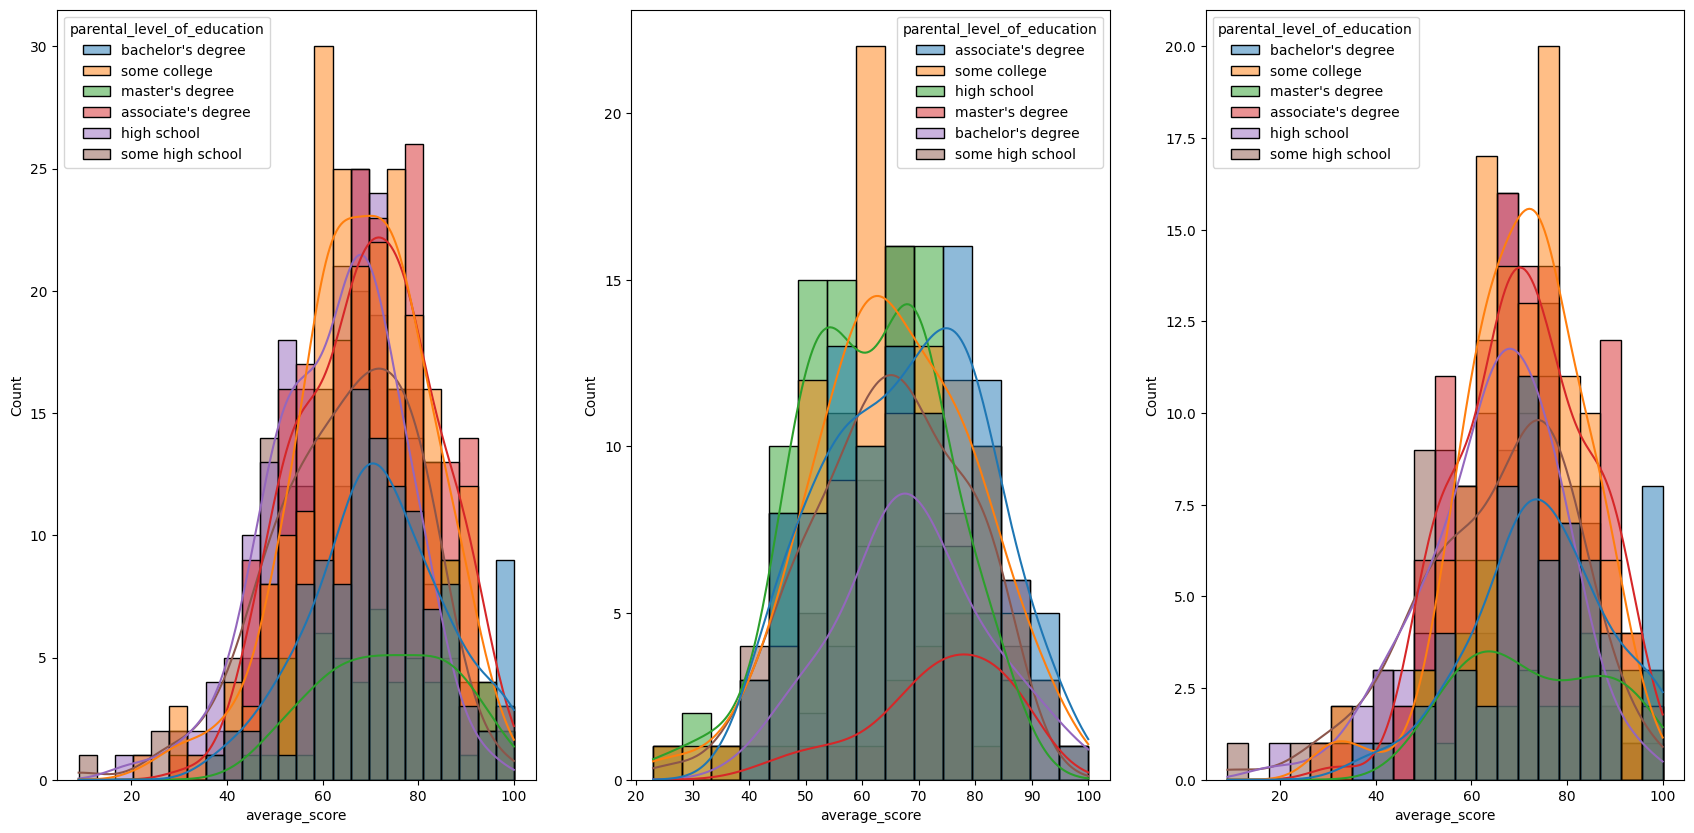

In [45]:
# Parental Level of Education vs Average score and for Respective genders 
fig, axes = plt.subplots(1, 3, figsize = (21,10))
plt.subplot(131)
sns.histplot(data = student_df, x = "average_score", kde = True, hue = "parental_level_of_education")
plt.subplot(132)
sns.histplot(data = student_df[student_df["gender"]=="male"], x = "average_score", kde = True, hue = "parental_level_of_education")
plt.subplot(133)
sns.histplot(data = student_df[student_df["gender"]=="female"], x = "average_score", kde = True, hue = "parental_level_of_education")
plt.show()

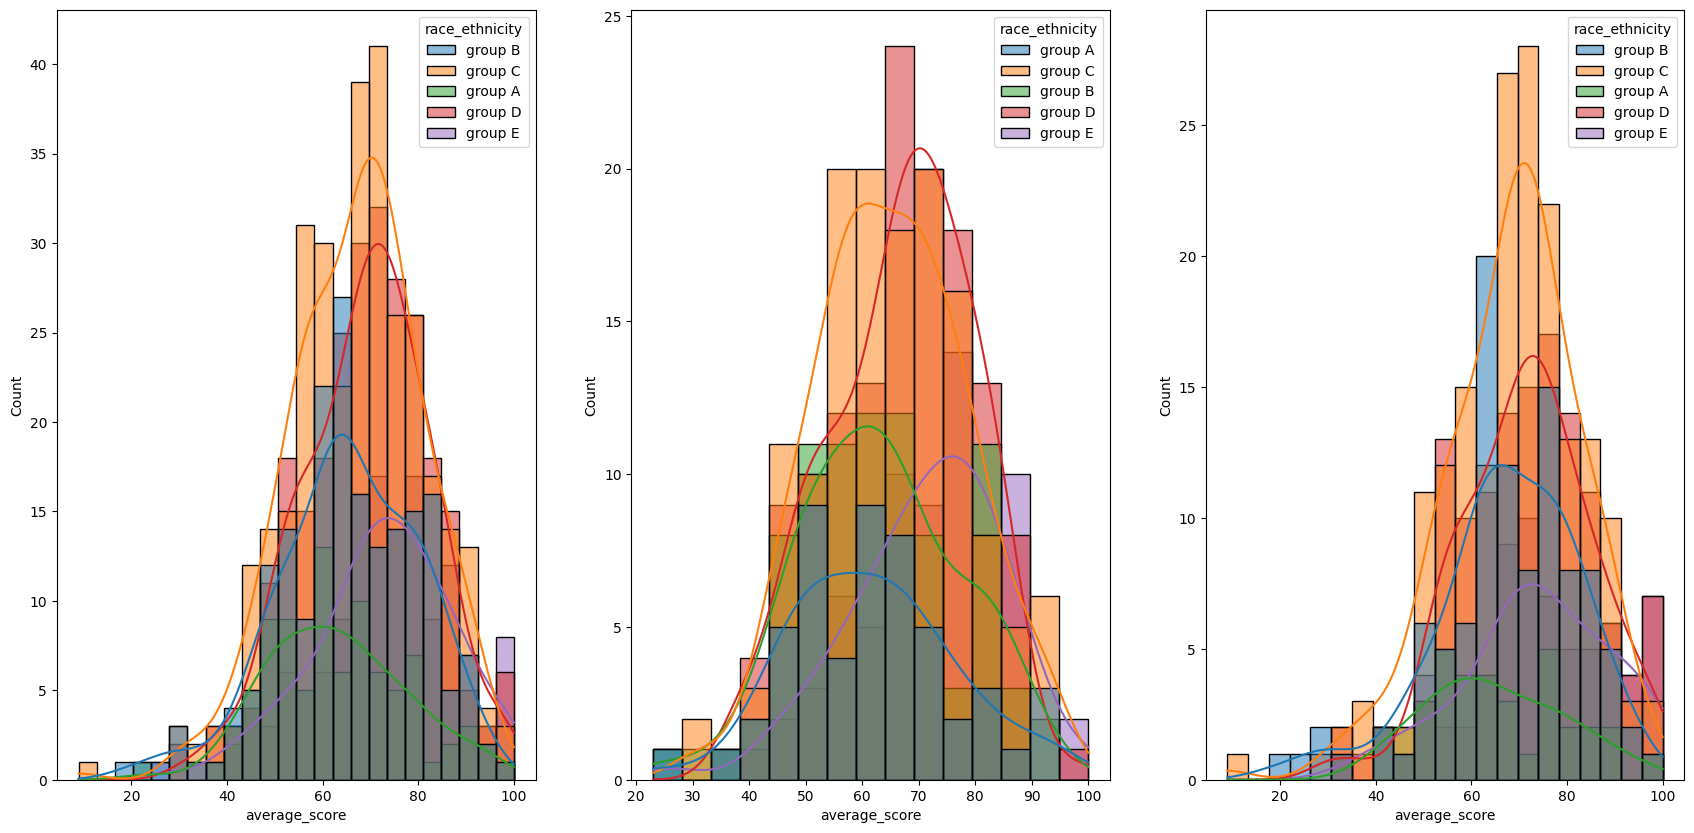

In [46]:
# Race Ethnicity vs Average score and for Respective genders 
fig, axes = plt.subplots(1, 3, figsize = (21,10))
plt.subplot(131)
sns.histplot(data = student_df, x = "average_score", kde = True, hue = "race_ethnicity")
plt.subplot(132)
sns.histplot(data = student_df[student_df["gender"]=="male"], x = "average_score", kde = True, hue = "race_ethnicity")
plt.subplot(133)
sns.histplot(data = student_df[student_df["gender"]=="female"], x = "average_score", kde = True, hue = "race_ethnicity")
plt.show()

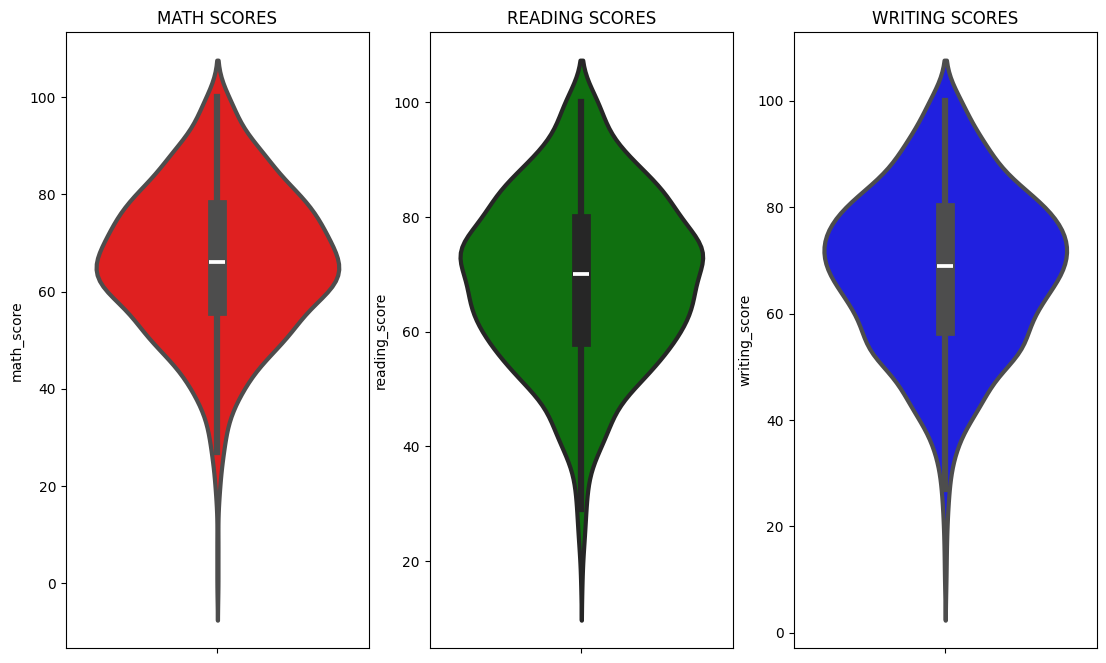

In [49]:
# Check Maximum Score Range
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=student_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=student_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=student_df,color='blue',linewidth=3)
plt.show()

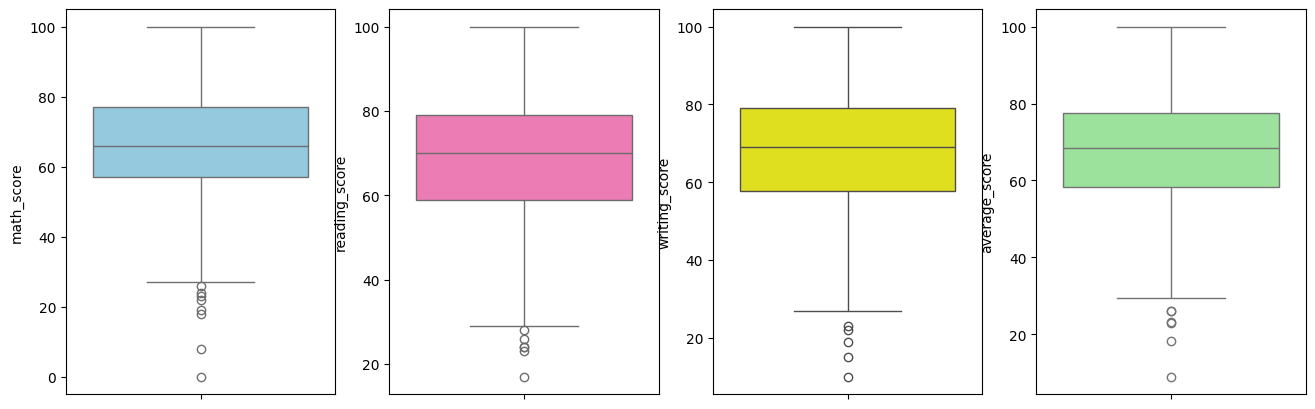

In [51]:
# Check Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_df['average_score'],color='lightgreen')
plt.show()